In [1]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
import time

In [2]:
device = ("cuda" if torch.cuda.is_available() else "cpu")
print(device)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1,), (0.3,))
])

train_set = datasets.FashionMNIST('Data_FashionMNIST/', download=True, train=True, transform=transform)
trainLoader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

test_set = datasets.FashionMNIST('DATA_FashionMNIST/', download=True, train=False, transform=transform)
testLoader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

cuda


100%|██████████| 26421880/26421880 [00:05<00:00, 4674850.64it/s] 


Extracting Data_FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to Data_FashionMNIST/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 268842.87it/s]


Extracting Data_FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to Data_FashionMNIST/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:02<00:00, 1619296.87it/s]


Extracting Data_FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to Data_FashionMNIST/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 14520697.37it/s]


Extracting Data_FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to Data_FashionMNIST/FashionMNIST/raw



100%|██████████| 26421880/26421880 [00:03<00:00, 6699576.33it/s]


Extracting DATA_FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to DATA_FashionMNIST/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 141943.17it/s]


Extracting DATA_FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to DATA_FashionMNIST/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 4181925.90it/s]


Extracting DATA_FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to DATA_FashionMNIST/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 26591474.13it/s]

Extracting DATA_FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to DATA_FashionMNIST/FashionMNIST/raw


<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


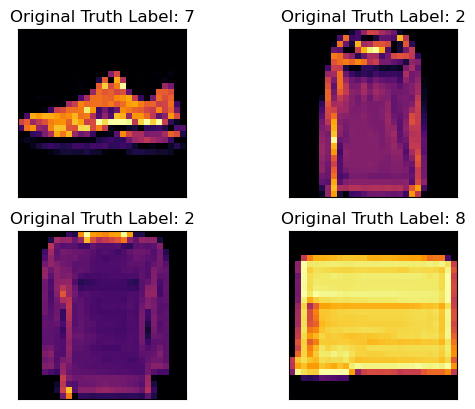

In [6]:
training_data = enumerate(trainLoader)
batch_idx, (images, labels) = next(training_data)
print(type(images))
print(images.shape)
print(labels.shape)

fig = plt.figure()
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i][0], cmap='inferno')
    plt.title("Original Truth Label: {}".format(labels[i]))
    plt.yticks([])
    plt.xticks([])
plt.show()